# matplotlib
[Matplotlib](https://matplotlib.org/) is a library for visualization in python.

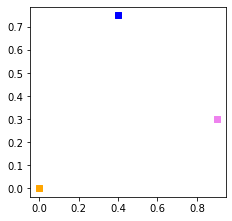

In [1]:
import matplotlib.pyplot as plt

# Create canvas
plt.figure(figsize=(3.5, 3.5))
# plot points
x = [0.0, 0.4, 0.9]
y = [0.0, 0.75, 0.3]
plt.scatter(x, y, marker="s", color=["orange", "blue", "violet"])
# display canvas
plt.show()

# NumPy

NumPy is used extensively to manipulate vectors and arrays in the UF3 framework. The [Numpy basics page](https://numpy.org/doc/stable/user/absolute_beginners.html) is a great reference for users transitioning from other programming languages. The [NumPy fundamentals page](https://numpy.org/doc/stable/user/basics.html) is an excellent resource for understanding indexing and broadcasting, concepts that appear frequently in the UF3 code.

In [2]:
import numpy as np

# water molecule coordinates
length = 0.958  # O-H length
angle = np.deg2rad(104.5)  # H-O-H bond angle
coordinates_list = [[0.0, 0.0, 0.0],  # oxygen
                    [1.0, 0.0, 0.0],   # hydrogen
                    [np.cos(angle), np.sin(angle), 0.0]]
coordinates = np.array(coordinates_list) 
coordinates *= length

print("Coordinates of OH2 aligned on x-axis")
print(coordinates)

Coordinates of OH2 aligned on x-axis
[[ 0.          0.          0.        ]
 [ 0.958       0.          0.        ]
 [-0.23986404  0.92748544  0.        ]]


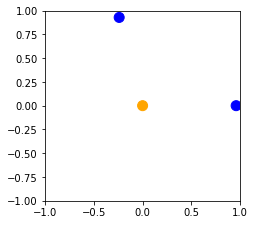

In [3]:
plt.figure(figsize=(3.5, 3.5))
plt.scatter(coordinates[:, 0], coordinates[:, 1], 
            s=100, color=["orange", "blue", "blue"])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

In [4]:
# Rotation about z-axis with rotation matrix
rotation_matrix = np.array([[np.cos(angle/2), -np.sin(angle/2), 0.0],
                            [np.sin(angle/2), np.cos(angle/2), 0.0],
                            [0.0, 0.0, 1.0]])
new_coordinates = np.dot(coordinates, rotation_matrix)

print("Coordinates of OH2, reoriented")
print(new_coordinates)

Coordinates of OH2, reoriented
[[ 0.          0.          0.        ]
 [ 0.58650415 -0.75748061  0.        ]
 [ 0.58650415  0.75748061  0.        ]]


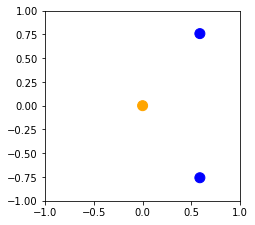

In [5]:
plt.figure(figsize=(3.5, 3.5))
plt.scatter(new_coordinates[:, 0], new_coordinates[:, 1], 
            s=100, color=["orange", "blue", "blue"])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

# ASE
The UF3 framework uses the Atomic Simulation Environment (ASE) to define, write, and read atomic configurations.

## ase.Atoms

The [ase.Atoms](https://wiki.fysik.dtu.dk/ase/ase/atoms.html) class is used to define atomic configurations.

In [6]:
import ase
# elements of atoms in system
composition = ["Ca", "Ti", "O", "O", "O"]
# lattice cell for repeating unit cell
lattice_constant = 3.889
lattice_vectors = [[lattice_constant, 0.0, 0.0],
                   [0.0, lattice_constant, 0.0],
                   [0.0, 0.0, lattice_constant]]
# atom positions (cartesian coordinates)
frac_coordinates = [[0.5, 0.5, 0.5],  # Ca
                    [0.0, 0.0, 0.0],  # Ti
                    [0.0, 0.5, 0.0],  # O
                    [0.0, 0.0, 0.5],  # O
                    [0.5, 0.0, 0.0],  # O
                   ]
# periodic in x, y, and z directions
periodicity = [True, True, True]

geometry = ase.Atoms(symbols=composition,
                     scaled_positions=frac_coordinates,
                     cell=lattice_vectors,
                     pbc=periodicity)
print(geometry)

Atoms(symbols='CaTiO3', pbc=True, cell=[3.889, 3.889, 3.889])


In [7]:
numbers = geometry.get_atomic_numbers()
cartesian_positions = geometry.get_positions()
volume = geometry.get_volume()

print("List of atomic numbers:", numbers)
print("Ca coordinate:", cartesian_positions[0])
print(f"Unit cell volume: {volume} cubic angstroms")

List of atomic numbers: [20 22  8  8  8]
Ca coordinate: [1.9445 1.9445 1.9445]
Unit cell volume: 58.81848436899998 cubic angstroms


## ase.build
[ase.build](https://wiki.fysik.dtu.dk/ase/ase/build/build.html) is a convenient module for creating Atoms from common crystal structures, surfaces, and molecule names.

In [8]:
from ase import build as ase_build

# Bulk wurtzite
name = "ZnS"
lattice_constant = 3.848
geometry = ase_build.bulk(name,
                          crystalstructure="wurtzite",
                          a=lattice_constant)
print(geometry)

Atoms(symbols='ZnSZnS', pbc=True, cell=[[3.848, 0.0, 0.0], [-1.924, 3.3324657537625195, 0.0], [0.0, 0.0, 6.283757686819779]])


In [9]:
# Aluminum (111) surface
name = "Al"
lattice_constant = 2.856
geometry = ase_build.fcc111(name,
                            size=(3, 3, 2),
                            a=lattice_constant)
print(geometry)

Atoms(symbols='Al18', pbc=[True, True, False], cell=[[6.05849090120634, 0.0, 0.0], [3.02924545060317, 5.246807029041566, 0.0], [0.0, 0.0, 0.0]], tags=...)
